# Required imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.model_selection import train_test_split

## use the following code to generate time series

In [2]:
# Time series generator
def generate_time_series(sample_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, sample_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))  # wave1
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20))  # wave2
    series += 0.1 * (np.random.rand(sample_size, n_steps) - 0.5)   # noise
    return series[..., np.newaxis].astype(np.float32)

### A) Creating a dataset of 10,000 samples with 51 time steps each

In [3]:
n_steps = 51
n_samples = 10000
series = generate_time_series(n_samples, n_steps)

X = series[:, :50, :] # First 50 steps as features
y = series[:, 50, 0] # 51st step as target

### B) Splitting the dataset in the ratio training: validation: testing = 70:20:10.

In [4]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/3, random_state=42)

print("Train:", X_train.shape, y_train.shape)
print("Val:  ", X_val.shape, y_val.shape)
print("Test: ", X_test.shape, y_test.shape)

Train: (7000, 50, 1) (7000,)
Val:   (2000, 50, 1) (2000,)
Test:  (1000, 50, 1) (1000,)


### B) Split the dataset in the ratio training: validation: testing = 70:20:10.

In [5]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=2/9, random_state=42)

In [6]:
model_rnn_1 = Sequential([
    SimpleRNN(20, activation='tanh', input_shape=(50, 1)),
    Dense(1)
])

model_rnn_1.compile(optimizer='adam', loss='mse')

C:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### C) Design, train, test and compare the performances of the following on the prediction of the value of 51st time step in the generated time series

In [7]:
# i. Simple RNN with one hidden layer and one output layer.
model1 = Sequential([
    SimpleRNN(20, activation="tanh", input_shape=[50, 1]),
    Dense(1, activation = "linear")
])

# Compiling the model
model1.compile(optimizer="adam", loss="mse", metrics=["mae"])

# Training/Fitting the model
history1 = model1.fit(X_train, y_train, epochs=15, validation_data=(X_val, y_val), verbose=1)

Epoch 1/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0704 - mae: 0.1930 - val_loss: 0.0086 - val_mae: 0.0746
Epoch 2/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0074 - mae: 0.0686 - val_loss: 0.0053 - val_mae: 0.0583
Epoch 3/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0047 - mae: 0.0551 - val_loss: 0.0043 - val_mae: 0.0529
Epoch 4/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0039 - mae: 0.0503 - val_loss: 0.0038 - val_mae: 0.0497
Epoch 5/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0035 - mae: 0.0474 - val_loss: 0.0035 - val_mae: 0.0475
Epoch 6/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0034 - mae: 0.0467 - val_loss: 0.0036 - val_mae: 0.0484
Epoch 7/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0033 - mae: 0.0466 - val_loss: 0.0034 - val_mae: 0.0473
Epoch 8/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0033 - mae: 0.0462 - val_loss: 0.0034 - val_mae: 0.0468
Epoch 9/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - lo

Text(0.5, 1.0, 'Training & Validation MAE')

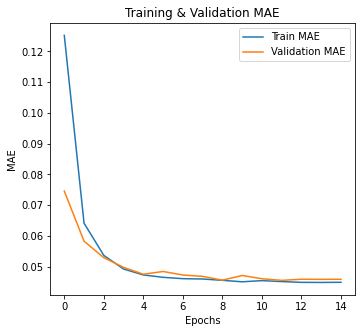

In [8]:
# Plot training & validation mae
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history1.history['mae'], label='Train MAE')
plt.plot(history1.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.title('Training & Validation MAE')

In [9]:
# ii. Simple RNN with two hidden layers and one output layer
model2 = Sequential([
    SimpleRNN(20, activation="tanh", return_sequences=True, input_shape=[50, 1]),
    SimpleRNN(20, activation="tanh"),
    Dense(1)
])

#Compiling the model
model2.compile(optimizer="adam", loss="mse", metrics=["mae"])

# Training/Fitting the model
history2 = model2.fit(X_train, y_train, epochs=15, validation_data=(X_val, y_val), verbose=1)

Epoch 1/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0816 - mae: 0.1886 - val_loss: 0.0071 - val_mae: 0.0670
Epoch 2/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0057 - mae: 0.0604 - val_loss: 0.0049 - val_mae: 0.0558
Epoch 3/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0039 - mae: 0.0502 - val_loss: 0.0039 - val_mae: 0.0503
Epoch 4/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0035 - mae: 0.0475 - val_loss: 0.0033 - val_mae: 0.0472
Epoch 5/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0032 - mae: 0.0453 - val_loss: 0.0033 - val_mae: 0.0463
Epoch 6/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0032 - mae: 0.0452 - val_loss: 0.0032 - val_mae: 0.0454
Epoch 7/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0030 - mae: 0.0436 - val_loss: 0.0034 - val_mae: 0.0470
Epoch 8/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0031 - mae: 0.0449 - val_loss: 0.0034 - val_mae: 0.0475
Epoch 9/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - lo

Text(0.5, 1.0, 'Training & Validation MAE')

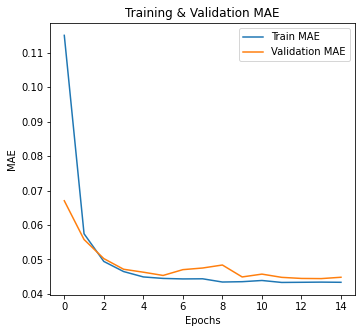

In [10]:
# Plot training & validation mae
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history2.history['mae'], label='Train MAE')
plt.plot(history2.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.title('Training & Validation MAE')

In [11]:
# Testing the 2 models
test_loss1, test_mae1 = model1.evaluate(X_test, y_test, verbose=0)
test_loss2, test_mae2 = model2.evaluate(X_test, y_test, verbose=0)

print("\nPerformance on Test Set:")
print(f"RNN (1 hidden layer) MSE: {test_loss1:.4f}, MAE: {test_mae1:.4f}")
print(f"RNN (2 hidden layers) MSE: {test_loss2:.4f}, MAE: {test_mae2:.4f}")


Performance on Test Set:
RNN (1 hidden layer) MSE: 0.0032, MAE: 0.0462
RNN (2 hidden layers) MSE: 0.0029, MAE: 0.0441


##### Both RNN has similar performance